In [7]:
# ==============================================================================
# Cell 1: Installation
# ==============================================================================
!pip install -q torch torchvision
!pip install -q supervision
!pip install -q git+https://github.com/facebookresearch/segment-anything.git
!pip install -q groundingdino-py

# ==============================================================================
# Cell 2: Imports and Setup
# ==============================================================================
import torch
import cv2
import supervision as sv
import numpy as np
from PIL import Image
import requests
from io import BytesIO
from groundingdino.util.inference import Model as GroundingDINOModel
from segment_anything import sam_model_registry, SamPredictor

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {DEVICE}")

# ==============================================================================
# Cell 3: Load Models
# ==============================================================================
# Clone the GroundingDINO repository to access the config file
!git clone https://github.com/IDEA-Research/GroundingDINO.git

GROUNDING_DINO_CONFIG_PATH = "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py"
GROUNDING_DINO_CHECKPOINT_PATH = "groundingdino_swint_ogc.pth"
import os
if not os.path.exists(GROUNDING_DINO_CHECKPOINT_PATH):
    !wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
grounding_dino_model = GroundingDINOModel(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH, device=DEVICE)

SAM_CHECKPOINT_PATH = "sam_vit_h_4b8939.pth"
if not os.path.exists(SAM_CHECKPOINT_PATH):
    !wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
sam = sam_model_registry["vit_h"](checkpoint=SAM_CHECKPOINT_PATH).to(device=DEVICE)
sam_predictor = SamPredictor(sam)
print("✅ Models loaded successfully!")

# ==============================================================================
# Cell 4: Define the Main Processing Function
# ==============================================================================
def segment_image_with_text(image_path_or_url, text_prompt):
    if image_path_or_url.startswith("http"):
        response = requests.get(image_path_or_url)
        image = Image.open(BytesIO(response.content)).convert("RGB")
    else:
        image = Image.open(image_path_or_url).convert("RGB")
    image_np = np.array(image)

    detections, _ = grounding_dino_model.predict_with_caption(image=image_np, caption=text_prompt, box_threshold=0.35, text_threshold=0.25)

    sam_predictor.set_image(image_np)
    boxes_for_sam = torch.tensor(detections.xyxy, device=DEVICE)
    masks, _, _ = sam_predictor.predict_torch(point_coords=None, point_labels=None, boxes=boxes_for_sam, multimask_output=False)

    mask_annotator = sv.MaskAnnotator()
    annotated_image = mask_annotator.annotate(scene=image_np.copy(), detections=sv.Detections(xyxy=detections.xyxy, mask=masks.squeeze(1).cpu().numpy()))

    return Image.fromarray(annotated_image)

# ==============================================================================
# Cell 5: Run the Segmentation Pipeline!
# ==============================================================================
IMAGE_PATH = "your_image_file_name.jpg"  # Replace with your uploaded image file name
TEXT_PROMPT = "the object you want to segment" # Replace with your text prompt
final_image = segment_image_with_text(IMAGE_PATH, TEXT_PROMPT)
display(final_image)

  Preparing metadata (setup.py) ... done
Using device: cuda
fatal: destination path 'GroundingDINO' already exists and is not an empty directory.
final text_encoder_type: bert-base-uncased
✅ Models loaded successfully!


FileNotFoundError: [Errno 2] No such file or directory: 'your_image_file_name.jpg'

  Preparing metadata (setup.py) ... done
Using device: cuda
fatal: destination path 'GroundingDINO' already exists and is not an empty directory.
final text_encoder_type: bert-base-uncased
✅ Models loaded successfully!


/usr/local/lib/python3.12/dist-packages/transformers/modeling_utils.py:1742: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/_dynamo/eval_frame.py:929: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/torch/utils/checkpoint.py:85: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/groundingdino/models/GroundingDINO/transformer.py:862: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `

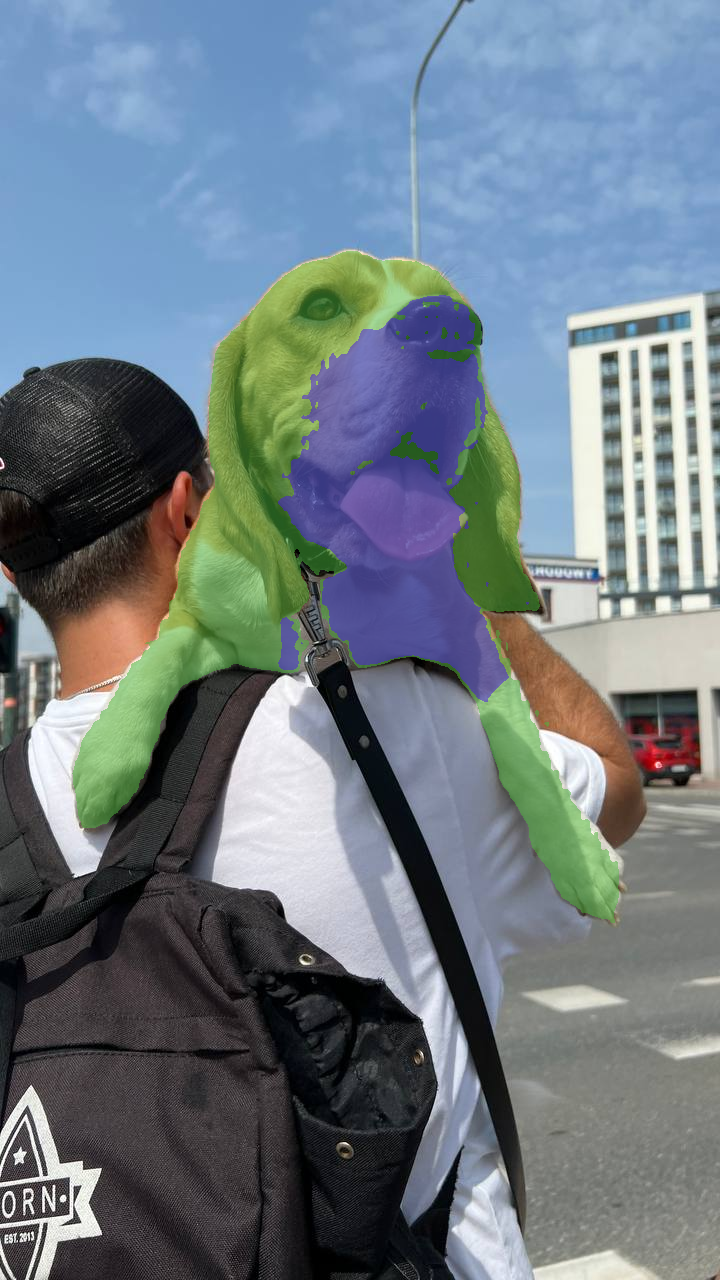

In [8]:
# ==============================================================================
# Cell 1: Installation
# ==============================================================================
!pip install -q torch torchvision
!pip install -q supervision
!pip install -q git+https://github.com/facebookresearch/segment-anything.git
!pip install -q groundingdino-py

# ==============================================================================
# Cell 2: Imports and Setup
# ==============================================================================
import torch
import cv2
import supervision as sv
import numpy as np
from PIL import Image
import requests
from io import BytesIO
from groundingdino.util.inference import Model as GroundingDINOModel
from segment_anything import sam_model_registry, SamPredictor

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {DEVICE}")

# ==============================================================================
# Cell 3: Load Models
# ==============================================================================
# Clone the GroundingDINO repository to access the config file
!git clone https://github.com/IDEA-Research/GroundingDINO.git

GROUNDING_DINO_CONFIG_PATH = "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py"
GROUNDING_DINO_CHECKPOINT_PATH = "groundingdino_swint_ogc.pth"
import os
if not os.path.exists(GROUNDING_DINO_CHECKPOINT_PATH):
    !wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
grounding_dino_model = GroundingDINOModel(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH, device=DEVICE)

SAM_CHECKPOINT_PATH = "sam_vit_h_4b8939.pth"
if not os.path.exists(SAM_CHECKPOINT_PATH):
    !wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
sam = sam_model_registry["vit_h"](checkpoint=SAM_CHECKPOINT_PATH).to(device=DEVICE)
sam_predictor = SamPredictor(sam)
print("✅ Models loaded successfully!")

# ==============================================================================
# Cell 4: Define the Main Processing Function
# ==============================================================================
def segment_image_with_text(image_path_or_url, text_prompt):
    if image_path_or_url.startswith("http"):
        response = requests.get(image_path_or_url)
        image = Image.open(BytesIO(response.content)).convert("RGB")
    else:
        image = Image.open(image_path_or_url).convert("RGB")
    image_np = np.array(image)

    detections, _ = grounding_dino_model.predict_with_caption(image=image_np, caption=text_prompt, box_threshold=0.35, text_threshold=0.25)

    sam_predictor.set_image(image_np)
    boxes_for_sam = torch.tensor(detections.xyxy, device=DEVICE)
    masks, _, _ = sam_predictor.predict_torch(point_coords=None, point_labels=None, boxes=boxes_for_sam, multimask_output=False)

    mask_annotator = sv.MaskAnnotator()
    annotated_image = mask_annotator.annotate(scene=image_np.copy(), detections=sv.Detections(xyxy=detections.xyxy, mask=masks.squeeze(1).cpu().numpy()))

    return Image.fromarray(annotated_image)

# ==============================================================================
# Cell 5: Run the Segmentation Pipeline!
# ==============================================================================
IMAGE_URL = "https://media.roboflow.com/notebooks/examples/dog.jpeg"
TEXT_PROMPT = "the dog's face"
final_image = segment_image_with_text(IMAGE_URL, TEXT_PROMPT)
display(final_image)